<a href="https://colab.research.google.com/github/ferdinandl007/MNIST_Experiments/blob/master/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Load MNIST Database

In [0]:
import keras
from keras.datasets import mnist


(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("The MNIST database has a training set of %d examples." % len(X_train))
print("The MNIST database has a test set of %d examples." % len(X_test))

### 2. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [0]:
from keras import backend as K

# input image dimensions
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# rescale [0,255] --> [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

### 3. Encode Categorical Integer Labels Using a One-Hot Scheme

In [0]:
from keras.utils import np_utils

num_classes = 10


print('Integer-valued labels:')
print(y_train[:num_classes])


y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)


print('One-hot labels:')
print(y_train[:num_classes])

Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]
One-hot labels:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


### 4. Split out validation data


In [0]:

y_val = y_train[54000:len(y_train)]
y_train = y_train[0:54000]

x_val = X_train[54000:len(X_train)]
X_train = X_train[0:54000]

print(len(X_train))


54000


### 5. Define the Model Architecture

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D


model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))

model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        4128      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 32)          4128      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 32)          0         


### 6. Compile the Model

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

### 7. Calculate the Classification Accuracy on the Test Set (Before Training)

In [0]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)







Test accuracy: 11.8300%


### 8. Train the Model

In [0]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import datetime

batch_size = 225
epochs = 20

# train the model
checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', 
                               verbose=2, save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=2, min_lr=0.000001)




#model.load_weights('mnist.model.best.hdf5')

history = model.fit(X_train, y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 callbacks=[checkpointer,reduce_lr],
                 verbose=1,
                 validation_data=(x_val, y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 3s 49us/step - loss: 0.5500 - acc: 0.8186 - val_loss: 0.0895 - val_acc: 0.9760

Epoch 00001: val_loss improved from inf to 0.08945, saving model to mnist.model.best.hdf5
Epoch 2/20
54000/54000 [==============================] - 2s 39us/step - loss: 0.1466 - acc: 0.9545 - val_loss: 0.0554 - val_acc: 0.9838

Epoch 00002: val_loss improved from 0.08945 to 0.05537, saving model to mnist.model.best.hdf5
Epoch 3/20
54000/54000 [==============================] - 2s 40us/step - loss: 0.1101 - acc: 0.9644 - val_loss: 0.0538 - val_acc: 0.9837

Epoch 00003: val_loss improved from 0.05537 to 0.05383, saving model to mnist.model.best.hdf5
Epoch 4/20
54000/54000 [==============================] - 2s 41us/step - loss: 0.0905 - acc: 0.9717 - val_loss: 0.0408 - val_acc: 0.9893

Epoch 00004: val_loss imp

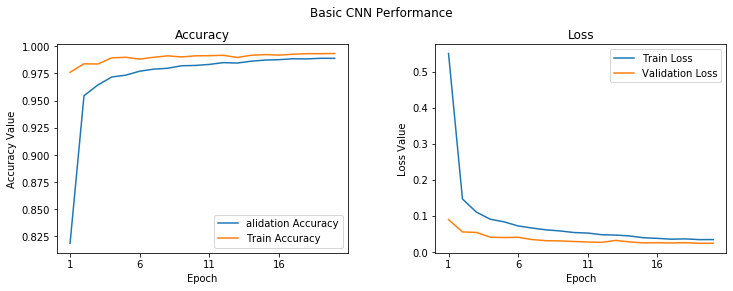

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(history.history['acc'])+1
epoch_list = list(range(1,max_epoch))
ax1.plot(epoch_list, history.history['acc'], label='alidation Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Train Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

### 9. Load the Model with the Best Classification Accuracy on the Validation Set

In [0]:
# load the weights that yielded the best validation accuracy
model.load_weights('mnist.model.best.hdf5')

### 10. Calculate the Classification Accuracy on the Test Set

In [0]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=1)
accuracy = 100*score[1]

print(score)
print(model.metrics_names)


# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)
print('Error: %.4f%%' % (100 - (score[1] * 100)))

In [0]:
from google.colab import files
files.download('mnist.model.best.hdf5')